In [1]:
from Nozzle_1D import Nozzle
temp = Nozzle("inputs.nml")
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%bash 
gcc -shared -o c_functions.so -fPIC functions.c

In [3]:
p,u,rho = temp.compute_newton()

In [4]:
temp.set_arrays()
U = np.random.rand(*temp.U.shape)
V = temp.primitive_to_conserved(U)[0]
temp_U = temp.conserved_to_primitive(V)

In [5]:
temp.set_geometry()
temp.set_initial_conditions()
temp.set_boundary_conditions()

R1 = temp.iteration_step()
temp.set_boundary_conditions()


In [6]:
R1

array([5.50611733e-02, 4.15890248e+01, 3.31840310e+04])

print(temp.V)

1.1460549523276852e-05
1.0972078091638564e-05
1.0427332779151082e-05
9.835031148800126e-06
9.204628207884152e-06
9.49001229690374e-06
9.999446588450802e-06
1.0407734246467934e-05
1.0713696397460107e-05
1.0917647602569143e-05
1.102115611998545e-05
1.1026871470888867e-05
1.0938389871959443e-05
1.0760141841718579e-05
1.049729359991156e-05
1.0155657985289616e-05
9.741613168223922e-06
9.262029261625306e-06
8.72420470090873e-06
8.135816324973433e-06
7.540043345838996e-06
6.916079264148971e-06
6.261907808912195e-06
5.691873079474167e-06
5.896458354723827e-06
6.0596400346007e-06
6.178639085213456e-06
6.2519922061436554e-06
6.27929498283243e-06
6.26101527242647e-06
6.198353991495806e-06
6.093138188108212e-06
5.947737227807189e-06
5.764996256687065e-06
5.5481840310287516e-06
5.300954113425621e-06
5.0273204040290185e-06
4.7316497371963635e-06
4.436377996284321e-06
4.720733885739455e-06
4.9565351828019384e-06
5.142570608018271e-06
5.2784802860511805e-06
5.364598448151342e-06
5.401847218653605e-06


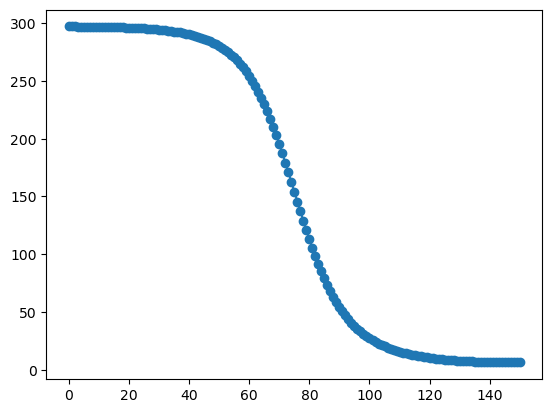

In [8]:
for i in range(50000):
    
    R = temp.iteration_step()
    if i%100 == 0:
        print(np.max(R/R1))
    temp.set_boundary_conditions()
    if np.any(R/R1)<.00001:
        print("Converged")
        break
p_compute = temp.V[:,2]
u_compute = temp.V[:,1]
rho_compute = temp.V[:,0]
plt.plot(p_compute[1:],"-o")
